In [1]:
# construimos nuestra funcion de interpolacion de Newton
# la funcion NewtonPol crea un objeto que evalua un polinomio
# en un cierto valor de x
def NewtonPol(dat):
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):  # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1.0
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x-p[0])
        return out

    def P(x):  # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0.0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P

In [2]:
# tomamos como ejemplo la misma lista de datos 
# usada para el polinomio de Lagrange
datos = [[0.1,3.2],[0.2,4.5],[0.3,5.1],[0.4,6.7],[0.5,7.1],[0.6,7.9]]
Table, Pn = NewtonPol(datos)

In [19]:
# Aqui podemos ver la estructura de la tabla de diferencias divididas
import numpy as np
xsize = np.shape(Table)[0]
ysize = np.shape(Table)[1]
for i in range(xsize):
    print([round(Table[i][j],1) for j in range(ysize)])

[3.2, 0, 0, 0, 0, 0]
[4.5, 13.0, 0, 0, 0, 0]
[5.1, 6.0, -35.0, 0, 0, 0]
[6.7, 16.0, 50.0, 283.3, 0, 0]
[7.1, 4.0, -60.0, -366.7, -1625.0, 0]
[7.9, 8.0, 20.0, 266.7, 1583.3, 6416.7]


In [20]:
# luego evaluamos el polinomio en un valor particular de x
Pn(0.55)

6.991015624999998

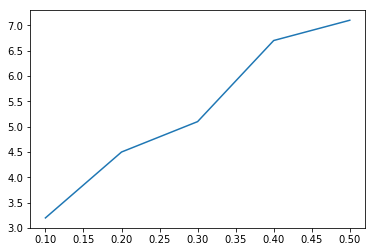

In [21]:
# Vamos a graficar el polinomio resultante
# sobre un cierto intervalo [0.1,0.5].

import numpy as np
x = np.arange(0.1,0.6,0.1)
y = np.zeros(np.size(x))
for i in range(np.size(x)):
    y[i]=Pn(x[i])
    
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()